In [2]:
# Check instance GPUs
!nvidia-smi

Tue Aug 22 10:31:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   40C    P0    37W / 300W |      0MiB / 16160MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Install required libraries
%pip install -q huggingface_hub
%pip install -q -U trl transformers accelerate einops
%pip install -q -U datasets evaluate xformers sentencepiece

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries
import evaluate
from datasets import load_dataset
from evaluate import evaluator
from transformers import AutoModelForSequenceClassification, pipeline
import pandas as pd
import evaluate
from evaluate.visualization import radar_plot

# Load dataset
dataset = load_dataset("financial_phrasebank","sentences_50agree", split='train')
# Select test dataset (20%)
data = dataset.select([i for i in list(range(3873,4841))])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Create Task for Text Classification
task_evaluator = evaluator("text-classification")

In [6]:
# # Create a custom subclass of TextClassificationEvaluator
# class CustomTextClassificationEvaluator(evaluator(task="text-classification").__class__):
#     METRIC_KWARGS = {"average": "macro"}
    
# # Instantiate the custom evaluator
# task_evaluator = CustomTextClassificationEvaluator()

In [7]:
# Load the desired metrics
accuracy_metric = evaluate.load('accuracy')
# f1_metric = evaluate.load('f1', "multilabel")
# recall_metric = evaluate.load('recall')
# precision_metric = evaluate.load("precision")
# metrics = evaluate.combine([accuracy_metric, f1_metric, precision_metric, recall_metric])
metrics = evaluate.combine([accuracy_metric])

In [8]:
# Result set
results = []

In [9]:
# Model list
models = [
    "distilbert-base-uncased",
    "IngeniousArtist/distilbert-finance",
    "yiyanghkust/finbert-tone",
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "ProsusAI/finbert",
    "stabilityai/stablelm-base-alpha-3b",
    "IngeniousArtist/stablelm-3b-finance",
    "CobraMamba/mamba-gpt-3b-v3",
    "bigscience/bloom-3b",
    "facebook/opt-2.7b",
    "EleutherAI/gpt-neo-2.7B",
    "openlm-research/open_llama_3b_v2",
]    

In [10]:
# distilbert-base-uncased

eval_results = task_evaluator.compute(
    model_or_pipeline="distilbert-base-uncased",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'accuracy': 0.5175619834710744, 'total_time_in_seconds': 9.262308850000181, 'samples_per_second': 104.50957916394475, 'latency_in_seconds': 0.009568500878099361}


In [11]:
# IngeniousArtist/distilbert-finance

eval_results = task_evaluator.compute(
    model_or_pipeline="IngeniousArtist/distilbert-finance",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric=metrics,
    label_mapping={"Negative": 0, "Neutral": 1, "Positive": 2}
)

results.append(eval_results)
print(eval_results)

{'accuracy': 0.7386363636363636, 'total_time_in_seconds': 6.485631668999986, 'samples_per_second': 149.25300254512527, 'latency_in_seconds': 0.006700032715909077}


In [12]:
# yiyanghkust/finbert-tone

eval_results = task_evaluator.compute(
    model_or_pipeline="yiyanghkust/finbert-tone",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric=metrics,
    label_mapping={"Negative": 0, "Neutral": 1, "Positive": 2}
)

results.append(eval_results)
print(eval_results)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'accuracy': 0.7758264462809917, 'total_time_in_seconds': 11.124604541000053, 'samples_per_second': 87.01432904265566, 'latency_in_seconds': 0.011492360063016585}


In [13]:
# cardiffnlp/twitter-roberta-base-sentiment-latest

eval_results = task_evaluator.compute(
    model_or_pipeline="cardiffnlp/twitter-roberta-base-sentiment-latest",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric=metrics,
    label_mapping={"negative": 0, "neutral": 1, "positive": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'accuracy': 0.5919421487603306, 'total_time_in_seconds': 11.394608748999872, 'samples_per_second': 84.95245614159094, 'latency_in_seconds': 0.011771290029958545}


In [14]:
# ProsusAI/finbert

eval_results = task_evaluator.compute(
    model_or_pipeline="ProsusAI/finbert",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric=metrics,
    label_mapping={"negative": 0, "neutral": 1, "positive": 2}
)

results.append(eval_results)
print(eval_results)

{'accuracy': 0.8853305785123967, 'total_time_in_seconds': 11.229223720000164, 'samples_per_second': 86.20364364777176, 'latency_in_seconds': 0.011600437727272896}


In [15]:
# stabilityai/stablelm-base-alpha-3b

eval_results = task_evaluator.compute(
    model_or_pipeline="stabilityai/stablelm-base-alpha-3b",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric=metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of GPTNeoXForSequenceClassification were not initialized from the model checkpoint at stabilityai/stablelm-base-alpha-3b and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'accuracy': 0.3853305785123967, 'total_time_in_seconds': 53.11389849200009, 'samples_per_second': 18.224984937714527, 'latency_in_seconds': 0.05486972984710753}


In [16]:
# IngeniousArtist/stablelm-3b-finance

eval_results = task_evaluator.compute(
    model_or_pipeline="IngeniousArtist/stablelm-3b-finance",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"Negative": 0, "Neutral": 1, "Positive": 2}
)

results.append(eval_results)
print(eval_results)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'accuracy': 0.08574380165289257, 'total_time_in_seconds': 46.64675497799999, 'samples_per_second': 20.751711463241932, 'latency_in_seconds': 0.04818879646487602}


In [17]:
# CobraMamba/mamba-gpt-3b-v3

eval_results = task_evaluator.compute(
    model_or_pipeline="CobraMamba/mamba-gpt-3b-v3",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at CobraMamba/mamba-gpt-3b-v3 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


{'accuracy': 0.46384297520661155, 'total_time_in_seconds': 45.843731169999955, 'samples_per_second': 21.115209763586112, 'latency_in_seconds': 0.04735922641528921}


In [18]:
# bigscience/bloom-3b

eval_results = task_evaluator.compute(
    model_or_pipeline="bigscience/bloom-3b",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of BloomForSequenceClassification were not initialized from the model checkpoint at bigscience/bloom-3b and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'accuracy': 0.3822314049586777, 'total_time_in_seconds': 38.641203083999926, 'samples_per_second': 25.05097985421726, 'latency_in_seconds': 0.03991859822727265}


In [19]:
# facebook/opt-2.7b

eval_results = task_evaluator.compute(
    model_or_pipeline="facebook/opt-2.7b",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-2.7b and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'accuracy': 0.4121900826446281, 'total_time_in_seconds': 39.33137891799993, 'samples_per_second': 24.611392395322216, 'latency_in_seconds': 0.04063158979132224}


In [20]:
# EleutherAI/gpt-neo-2.7B

eval_results = task_evaluator.compute(
    model_or_pipeline="EleutherAI/gpt-neo-2.7B",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-2.7B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'accuracy': 0.503099173553719, 'total_time_in_seconds': 42.37145705900002, 'samples_per_second': 22.845567917386248, 'latency_in_seconds': 0.043772166383264484}


In [21]:
# openlm-research/open_llama_3b_v2

eval_results = task_evaluator.compute(
    model_or_pipeline="openlm-research/open_llama_3b_v2",
    input_column = "sentence",
    label_column = "label",
    data=data,
    metric= metrics,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
)

results.append(eval_results)
print(eval_results)

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at openlm-research/open_llama_3b_v2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'accuracy': 0.503099173553719, 'total_time_in_seconds': 44.71334918499997, 'samples_per_second': 21.649015733420747, 'latency_in_seconds': 0.04619147643078509}


In [23]:
# Create Dataframe

df = pd.DataFrame(results, index=models)
df[["accuracy", "total_time_in_seconds", "samples_per_second", "latency_in_seconds"]]

,accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
distilbert-base-uncased,0.517562,9.262309,104.509579,0.009569
IngeniousArtist/distilbert-finance,0.738636,6.485632,149.253003,0.006700
yiyanghkust/finbert-tone,0.775826,11.124605,87.014329,0.011492
cardiffnlp/twitter-roberta-base-sentiment-latest,0.591942,11.394609,84.952456,0.011771
ProsusAI/finbert,0.885331,11.229224,86.203644,0.011600
stabilityai/stablelm-base-alpha-3b,0.385331,53.113898,18.224985,0.054870
IngeniousArtist/stablelm-3b-finance,0.085744,46.646755,20.751711,0.048189
CobraMamba/mamba-gpt-3b-v3,0.463843,45.843731,21.115210,0.047359
bigscience/bloom-3b,0.382231,38.641203,25.050980,0.039919
facebook/opt-2.7b,0.412190,39.331379,24.611392,0.040632


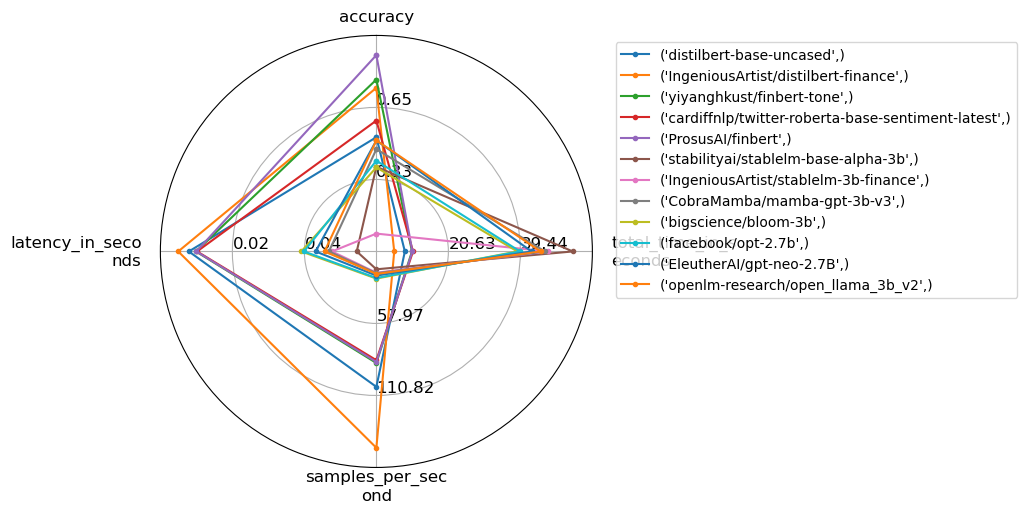

In [24]:
# Visualize Results

plot = radar_plot(data=results, model_names=models, invert_range=["latency_in_seconds"])
plot.show()